In [1]:
import tensorflow as tf
import json
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [3]:
gpus

[]

In [4]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [8]:
images.as_numpy_iterator().next()

b'data\\images\\ead10237-0655-11f0-9068-78af08054596.jpg'

In [9]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [10]:
images = images.map(load_image)

In [11]:
images.as_numpy_iterator().next()

array([[[116, 101,  96],
        [113, 100,  94],
        [111,  98,  92],
        ...,
        [177, 171, 183],
        [175, 172, 183],
        [175, 172, 183]],

       [[117, 102,  97],
        [117, 102,  97],
        [115, 102,  96],
        ...,
        [176, 170, 182],
        [176, 170, 182],
        [174, 171, 182]],

       [[118, 100,  96],
        [116, 101,  96],
        [116, 103,  97],
        ...,
        [175, 169, 179],
        [176, 170, 180],
        [176, 170, 180]],

       ...,

       [[ 54,  55,  50],
        [ 54,  55,  50],
        [ 54,  55,  50],
        ...,
        [ 60,  57,  64],
        [ 54,  49,  56],
        [ 64,  59,  66]],

       [[ 58,  58,  56],
        [ 58,  58,  56],
        [ 58,  58,  56],
        ...,
        [ 65,  60,  66],
        [ 59,  54,  61],
        [ 54,  49,  56]],

       [[ 54,  54,  52],
        [ 56,  56,  54],
        [ 59,  59,  57],
        ...,
        [ 60,  55,  61],
        [ 65,  60,  67],
        [ 62,  57,  64]]

In [12]:
image_generator = images.batch(4).as_numpy_iterator()

In [13]:
plot_images = image_generator.next()

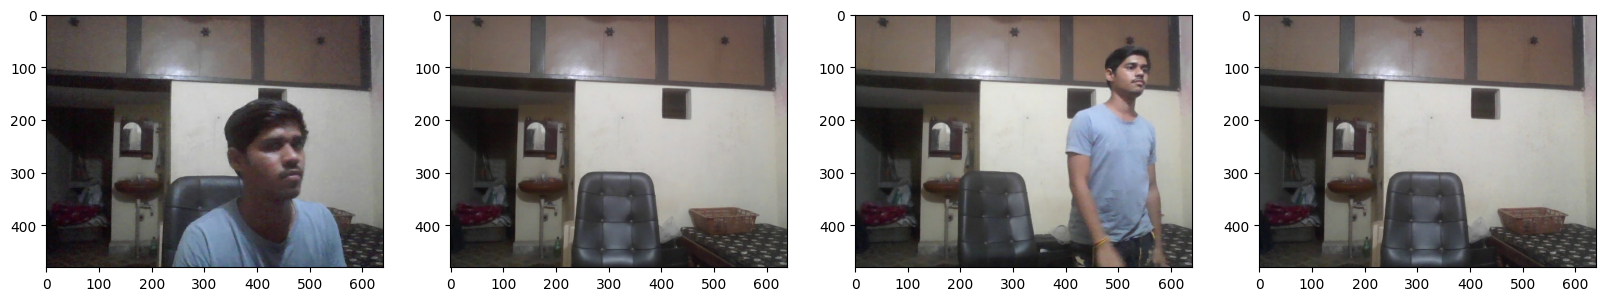

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)

plt.show()